Introduction to sound processing
======

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (14, 4)

### Audio features

Raw audio signal in time domain --> amplitude representation
                                --> not the best for machine learning systems.

We need to transform the waveform into time-frequency representation.


Audio by itself comes in amplitude representation, where amplitude of the sound changes at a certain frequency over time. What we need to do is extract what frequencies are present in each unit of time - those frequencies, when combined, create sounds. Think of playing piano notes - each note resonates at a particular frequency and those frequencies combine to create a particular tune. If we know what notes are being played, we can attempt to classify a particular piano solo. Hence we need a mechanism of breaking down amplitude over time over frequencies over time: such representation is also commonly called a spectrogram.

### Waveforms

In [3]:
dog_bark, sr = librosa.load("wav/dog_bark.wav",mono=True)
ipd.Audio(data=dog_bark,rate=sr)

Text(0.5,1,u'Dog bark')

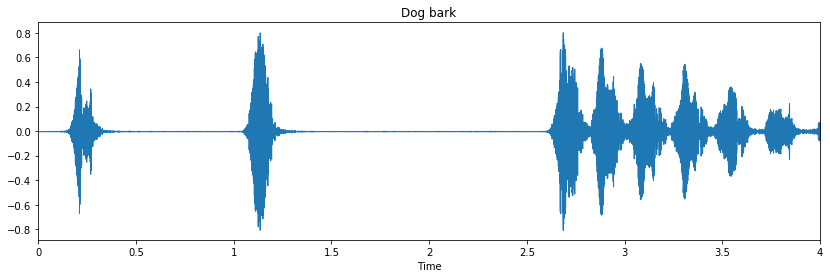

In [4]:
librosa.display.waveplot(dog_bark, sr=sr)
plt.title('Dog bark')

In [5]:
children_playing, sr = librosa.load("wav/children_playing.wav",mono=True)
ipd.Audio(data=children_playing,rate=sr)

Text(0.5,1,u'Children playing')

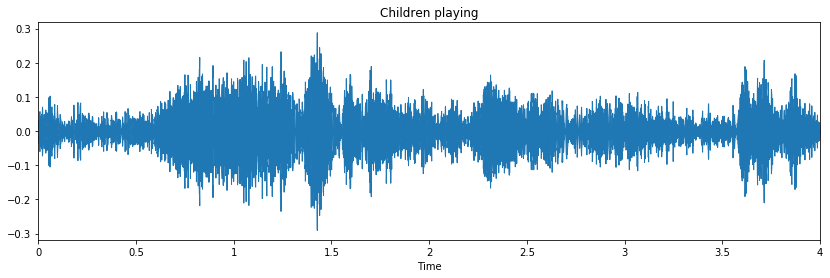

In [6]:
librosa.display.waveplot(children_playing, sr=sr)
plt.title('Children playing')

In [7]:
jackhammer, sr = librosa.load("wav/jackhammer.wav",mono=True)
ipd.Audio(data=jackhammer,rate=sr)

Text(0.5,1,u'Jackhammer')

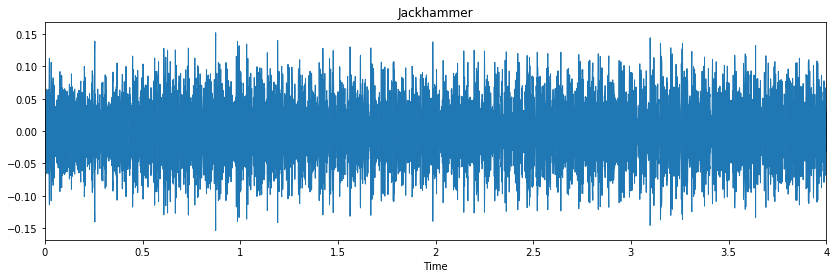

In [8]:
librosa.display.waveplot(jackhammer, sr=sr)
plt.title('Jackhammer')

In [9]:
siren, sr = librosa.load("wav/siren.wav",mono=True)
ipd.Audio(data=siren,rate=sr)

Text(0.5,1,u'Siren')

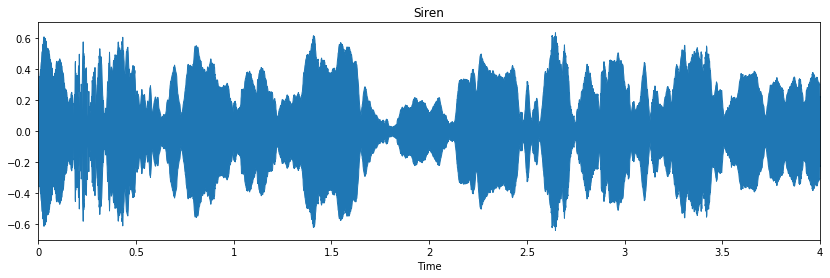

In [10]:
librosa.display.waveplot(siren, sr=sr)
plt.title('Siren')

### Time-frequency representation

#### Spectrograms

In [11]:
# Number of frequency bins for Fast Fourier Transform
N_FFT = 1024
# Number of audio frames between STFT columns
HOP_SIZE=1024
# Number of FFT bins in each window 
WIN_LENGTH=1024
# Windowing function
WINDOW='hann'
# Sampling frequency of 44kHz
SR=44100

Text(0.5,1,u'Dog bark')

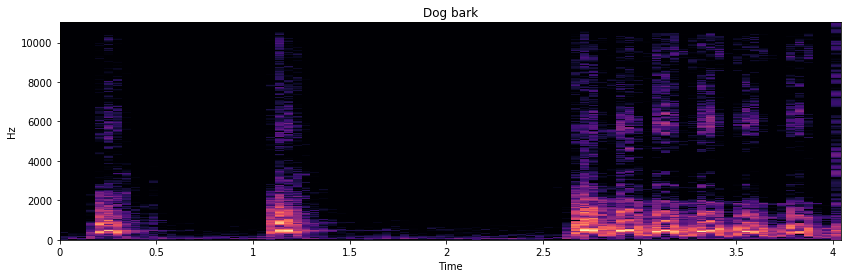

In [12]:
D_dog_bark =librosa.stft(dog_bark, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
log_power_dog_bark =librosa.logamplitude(D_dog_bark**2, ref_power=np.max)

librosa.display.specshow(log_power_dog_bark,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Dog bark')

Text(0.5,1,u'Children playing')

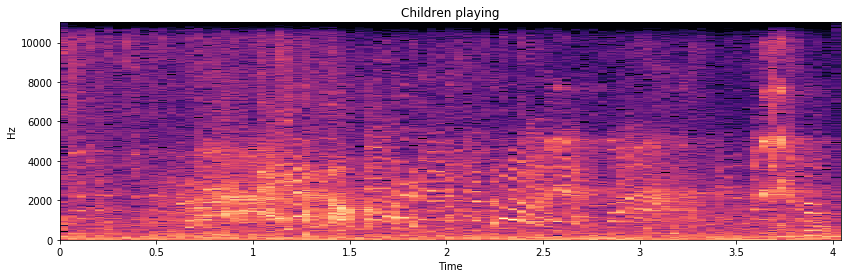

In [13]:
D_children_playing =librosa.stft(children_playing,  n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
log_power_children_playing =librosa.logamplitude(D_children_playing**2, ref_power=np.max)

librosa.display.specshow(log_power_children_playing,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Children playing')

Text(0.5,1,u'Jackhammer')

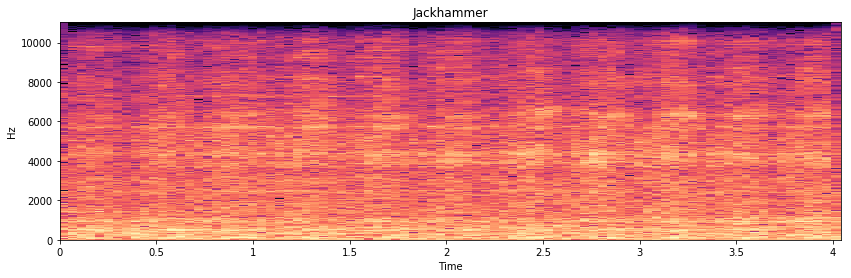

In [14]:
D_jackhammer =librosa.stft(jackhammer, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
log_power_jackhammer =librosa.logamplitude(D_jackhammer**2, ref_power=np.max)

librosa.display.specshow(log_power_jackhammer,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Jackhammer')

Text(0.5,1,u'Siren')

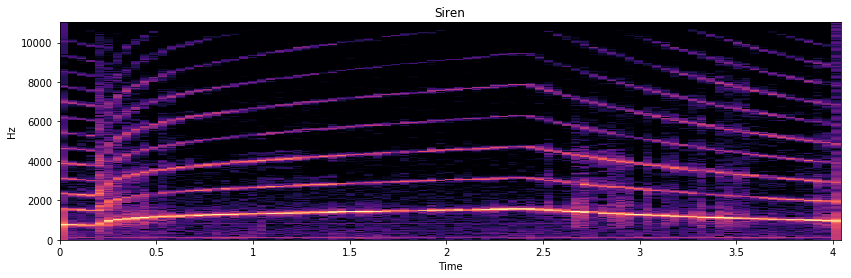

In [15]:
D_siren =librosa.stft(siren, n_fft=N_FFT, hop_length=HOP_SIZE, window = WINDOW, win_length = WIN_LENGTH)
log_power_siren =librosa.logamplitude(D_siren**2, ref_power=np.max)

librosa.display.specshow(log_power_siren,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='linear')
plt.title('Siren')

#### Mel-spectrograms

Mel scale comes from *melody* : it is inspired by human hearing system.

Mel frequency spacing approximates the mapping of frequencies to patches of nerves in the cochlea.

More resolution on lower frequencies, less on higher.


Text(0.5,1,u'Dog bark')

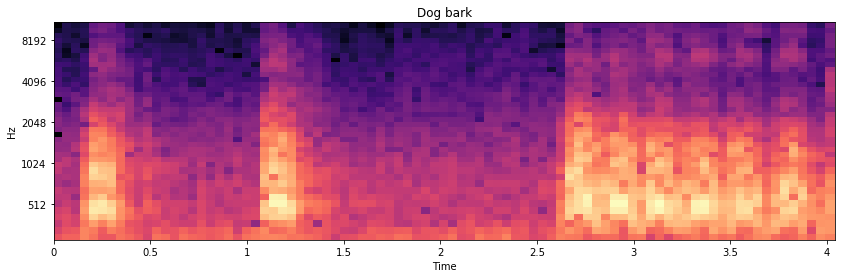

In [16]:
N_MELS =  40

melS_dog_bark = librosa.feature.melspectrogram(S=D_dog_bark, n_mels=N_MELS)
log_mel_dog_bark =librosa.logamplitude(melS_dog_bark, ref_power=np.max)

librosa.display.specshow(log_mel_dog_bark,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Dog bark')

Text(0.5,1,u'Children playing')

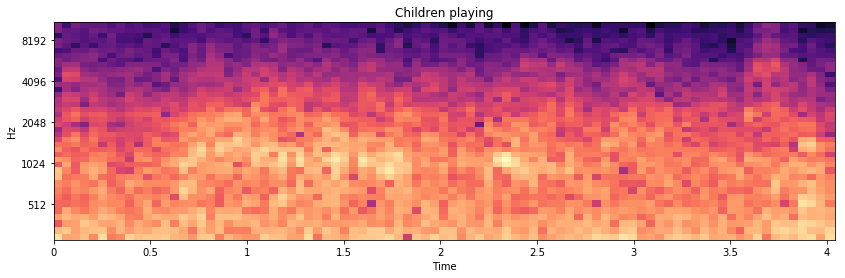

In [17]:
melS_children_playing = librosa.feature.melspectrogram(S=D_children_playing, n_mels=N_MELS)
log_mel_children_playing =librosa.logamplitude(melS_children_playing, ref_power=np.max)

librosa.display.specshow(log_mel_children_playing,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Children playing')


Text(0.5,1,u'Jackhammer')

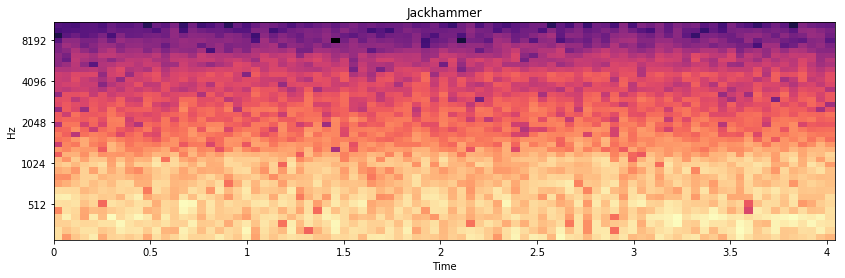

In [18]:
melS_jackhammer = librosa.feature.melspectrogram(S=D_jackhammer, n_mels=N_MELS)
log_mel_jackhammer =librosa.logamplitude(melS_jackhammer, ref_power=np.max)

librosa.display.specshow(log_mel_jackhammer,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Jackhammer')

Text(0.5,1,u'Siren')

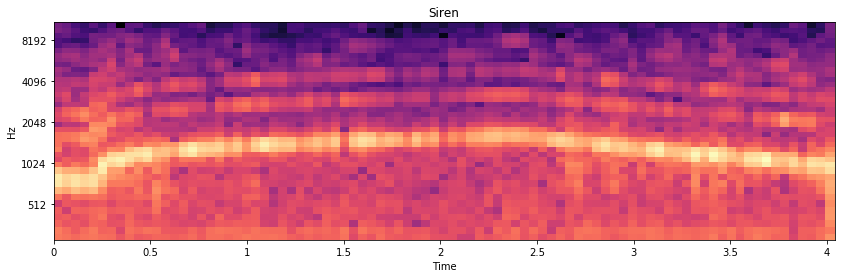

In [23]:
melS_siren = librosa.feature.melspectrogram(S=D_siren, n_mels=N_MELS)
log_mel_siren =librosa.logamplitude(melS_siren, ref_power=np.max)

librosa.display.specshow(log_mel_siren,sr=sr,hop_length=HOP_SIZE, x_axis='time', y_axis='mel')
plt.title('Siren')